In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
# Folder for exporting plots
data_path = r'C:\Users\YourDirectory'

# csv raw data after calibration
# Fill-in: Paste file location
num_dataset = 3
data1 = pd.read_csv (r'C:\Users\YourFile.csv')

In [3]:
def gauss(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)
def gaussleft(mu, sigma):
    gauss_left_end = mu-10*sigma
    return gauss_left_end
def gaussright(mu, sigma):
    gauss_right_end = mu+10*sigma
    return gauss_right_end

(0.0, 2170.0)

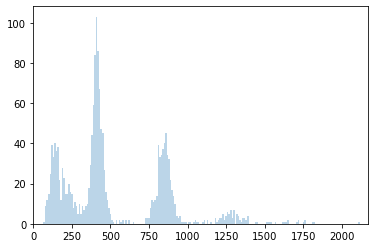

In [4]:
# Check imported plots & determine bar container
# Fill-in. The higher the number, the lower the resolution of the hist
step1 = 10

data1['masses_kDa'] = data1['masses_kDa']
lowest_MW1 = 0
highest_MW1 = round(data1['masses_kDa'].max(), -1)   
data1 = data1[(data1.masses_kDa > lowest_MW1) & (data1.masses_kDa < highest_MW1)]
masses1 = data1['masses_kDa']
q1 = list(np.arange(-5,highest_MW1,step1)) #creates a list from -5 to highest_MW with steps of x
counts1, bins1, patches1 = plt.hist(masses1, bins = q1, alpha = .3)

# plt.ylim(0,80)
plt.xlim(lowest_MW1, highest_MW1)

        params_1a     sigma
mu     414.547337  2.243952
sigma   29.467415  2.243952
A       89.021601  5.870214
        params_1b     sigma
mu     851.055227  8.596037
sigma   42.509555  8.596037
A       40.698659  7.125833


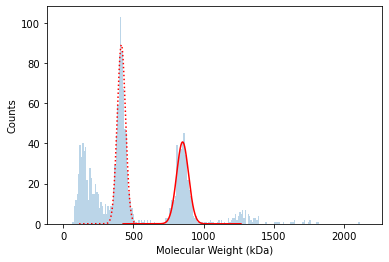

In [5]:
# Set expected fitted peaks according to MP outcome. Each "expected" variable is for a single dataset.
# mu - avr of gaussian distribution
# sigma - std dev of peak
# A - Height of peak after selecting the corresponding bin container

# Fill-in: MW, std dev, peak height in determined bin container size
expected1a = (413, 30, 150)
expected1b = (847, 42, 70)

counts1, bins1, patches1 = plt.hist(masses1, bins = q1, alpha = .3)
x1 = np.linspace(lowest_MW1, highest_MW1, len(patches1))
params1a, cov1a = curve_fit(gauss, x1, counts1, expected1a)
params1b, cov1b = curve_fit(gauss, x1, counts1, expected1b)
sigma1a=np.sqrt(np.diag(cov1a))
sigma1b=np.sqrt(np.diag(cov1b))

x_fit1a = np.linspace(gaussleft(expected1a[0], expected1a[1]),gaussright(expected1a[0], expected1a[1]), 5000)
x_fit1b = np.linspace(gaussleft(expected1b[0], expected1b[1]),gaussright(expected1b[0], expected1b[1]), 5000)

y_fit1a = gauss(x_fit1a, *params1a[:3])
y_fit1b = gauss(x_fit1b, *params1b[:3])

plt.plot(x_fit1a, y_fit1a, color='red', lw=1.5, ls=":")
plt.plot(x_fit1b, y_fit1b, color='red', lw=1.5, ls="-")

plt.ylabel('Counts')
plt.xlabel('Molecular Weight (kDa)')

print(pd.DataFrame(data={'params_1a': params1a, 'sigma': sigma1a}, index=gauss.__code__.co_varnames[1:]))
print(pd.DataFrame(data={'params_1b': params1b, 'sigma': sigma1b}, index=gauss.__code__.co_varnames[1:]))